In [58]:
# 모델결정 model = keras.Sequential()
# Flatten 추가 model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가 model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가 model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)

In [59]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [60]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [61]:
train_input.shape

(60000, 28, 28)

In [62]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten층에서 사이즈 그대로 적용(28,28)

In [63]:
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [64]:
# from keras.layers import Dense
# model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28,28)))
# model.add(Dense(100,activation='relu')) # sigmoid
# model.add(Dense(10,activation='softmax'))

In [65]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
train_scaled.shape

(48000, 28, 28)

In [67]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

epochs = 20 => 훈련세트 정확도가 높아짐
검증세트를 가지고 정확도를 측정 

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌떄마다 loss,accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7655 - loss: 0.6853
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.8544 - loss: 0.4056
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 961us/step - accuracy: 0.8730 - loss: 0.3595
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.8801 - loss: 0.3322
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.8884 - loss: 0.2981
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.8918 - loss: 0.2930
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.9016 - loss: 0.2699
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.9044 - loss: 0.2596
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9061 - loss: 0.2546
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.9076 - loss: 0.2470
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9135 - loss: 0.2348
Epoch 12/20


In [69]:
# history.keys - index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [70]:
font_path = 'NanumBarunGothic.ttf'

In [71]:
# train세트 검증데이터(loss,accuracy) 그래프 - history

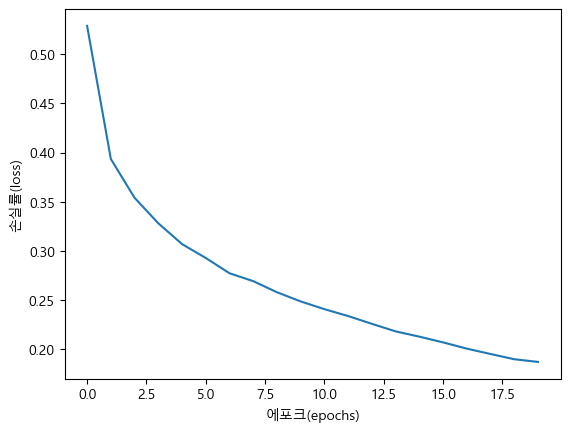

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

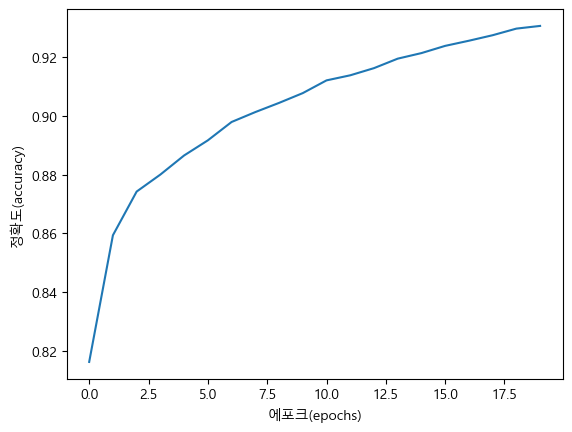

In [73]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

In [74]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8903 - loss: 0.3401


[0.33758223056793213, 0.890916645526886]

검증세트도 함께 검증 

In [75]:
# model.fit - loss,accuracy정보를 리턴(history)
# 검증 세트(test,val)도 함께 검증 - history정보로 받을 수 있음.

In [76]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌떄마다 loss,accuracy 값을 저장
# traic_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9335 - loss: 0.1805 - val_accuracy: 0.8831 - val_loss: 0.3706
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9332 - loss: 0.1803 - val_accuracy: 0.8915 - val_loss: 0.3446
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9361 - loss: 0.1718 - val_accuracy: 0.8914 - val_loss: 0.3540
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9369 - loss: 0.1667 - val_accuracy: 0.8879 - val_loss: 0.3547
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9385 - loss: 0.1641 - val_accuracy: 0.8922 - val_loss: 0.3538
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9406 - loss: 0.1595 - val_accuracy: 0.8874 - val_loss: 0.3522
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9427 - loss: 0.1536 - val_accuracy: 0.8887 - val_loss: 0.3819
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9455 - loss: 0.1495 - 

In [77]:
# 총 4개 속성 - train세트 2개(accuracy,loss) , test세트 2개(val_accuracy,val_loss)
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

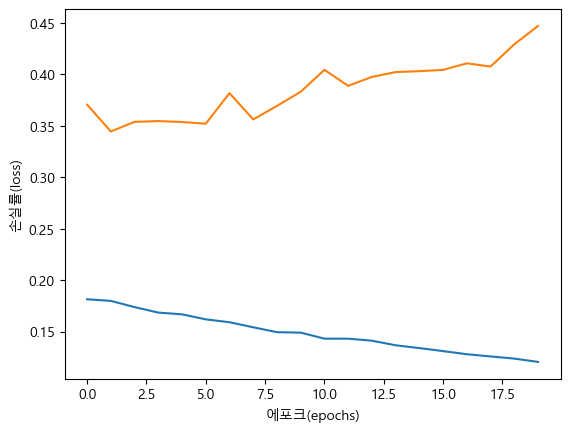

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.show()

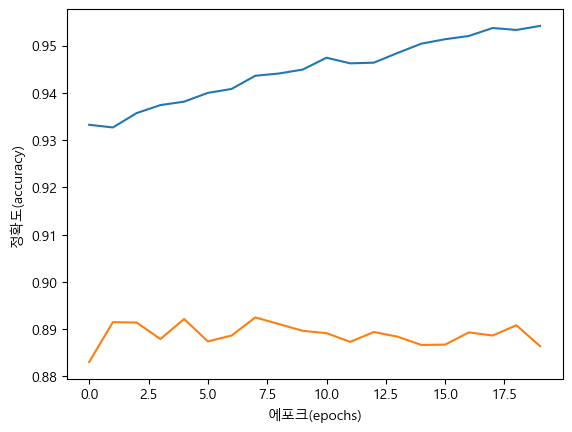

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
plt.show()

In [81]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8876 - loss: 0.4405


[0.4472499191761017, 0.8864166736602783]